In [1]:
%matplotlib inline
import IPython
import pylab

import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import scipy as sp

import scipy.signal

from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
from datetime import datetime

pylab.rcParams['figure.figsize'] = (16, 4)

In [2]:
client = Elasticsearch()

In [3]:
def hist_data(terms=None, start='1900-01-01', end='2020-01-01'):
    q = Search(using=client, index='records-hep')[0:0]
    if terms:
        q = q.query('match', abstract=terms)
    start_date = datetime(1950, 1, 1, 0, 0, 0)
    q = q.filter('range', earliest_date={'gte': start, 'lt': end})
    q.aggs.bucket(
        'group_by_date', 
        'date_histogram', 
        field='earliest_date', 
        interval='day', 
        format='date_optional_time'
    )
    return q.execute().aggregations.group_by_date.buckets

In [4]:
def unzip(data):
    x, y = zip(*[(datetime.strptime(e.key_as_string, "%Y-%m-%dT%H:%M:%S.%fZ"), e.doc_count) for e in data])
    return np.array(x), np.array(y)

## All

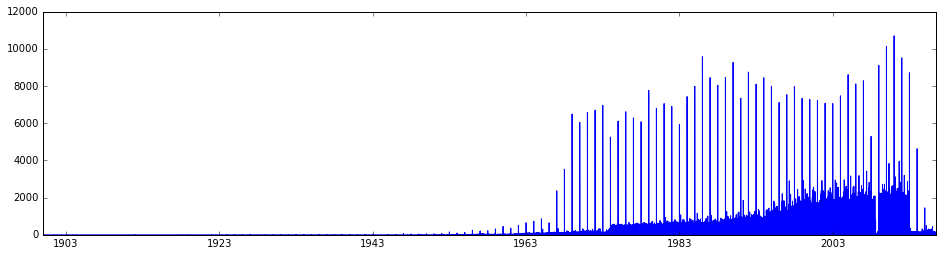

In [41]:
x, y = unzip(hist_data())
plt.plot(x, y)

## 1990-2017

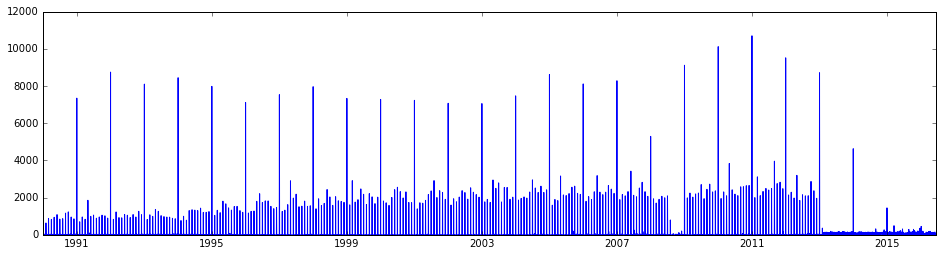

In [6]:
x, y = unzip(hist_data(None, '1990-01-01', '2017-01-01'))
plt.plot(x, y)

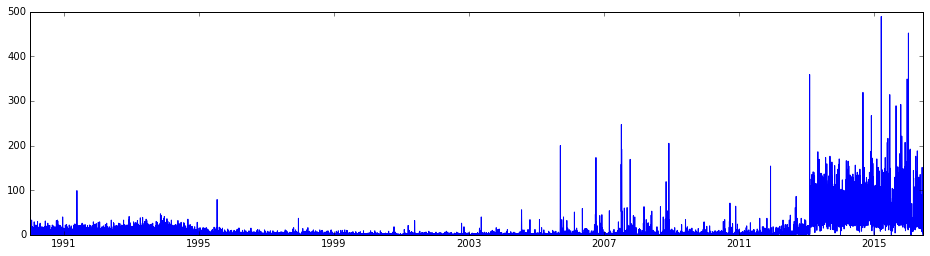

In [7]:
x, y = unzip(hist_data(None, '1990-01-01', '2017-01-01'))
y[y >= 500] = 0
plt.plot(x, y)

## 1990-2005

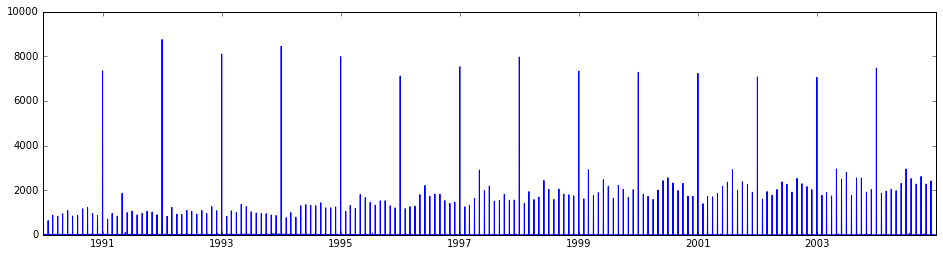

In [8]:
x, y = unzip(hist_data(None, '1990-01-01', '2005-01-01'))
plt.plot(x, y)

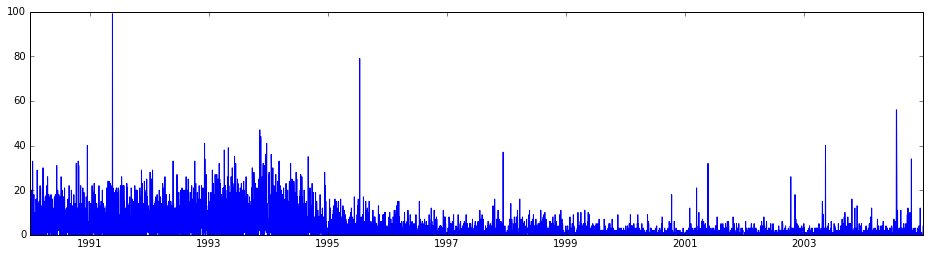

In [9]:
x, y = unzip(hist_data(None, '1990-01-01', '2005-01-01'))
y[y >= 500] = 0
plt.plot(x, y)

## 2013-2017

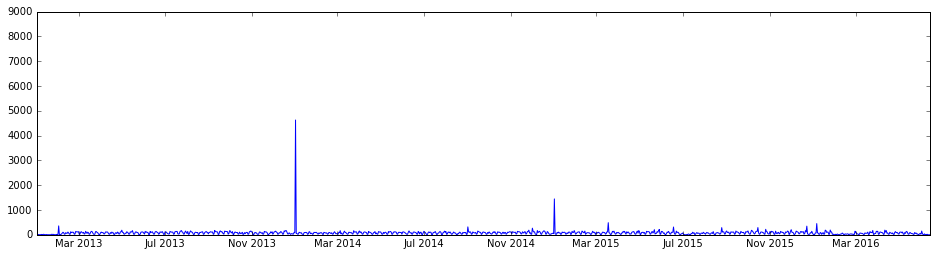

In [10]:
x, y = unzip(hist_data(None, '2013-01-01', '2017-01-01'))
plt.plot(x, y)

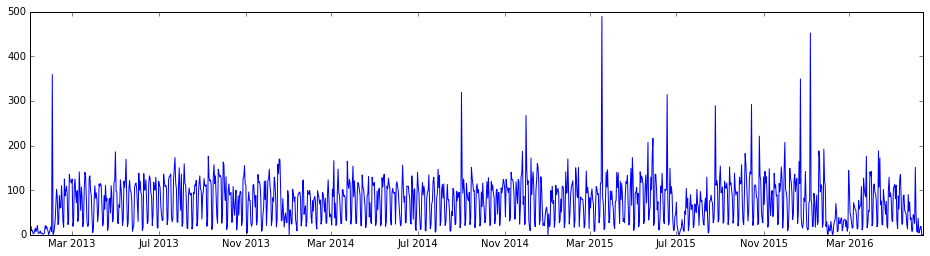

In [11]:
x, y = unzip(hist_data(None, '2013-01-01', '2017-01-01'))
y[y >= 500] = 0
plt.plot(x, y)

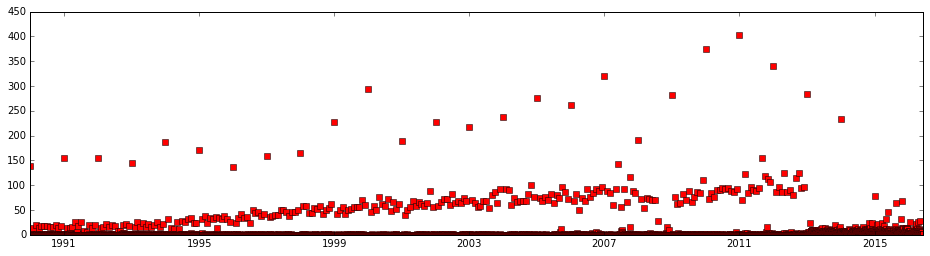

In [37]:
x, y = unzip(hist_data('proton', '1990-01-01', '2017-01-01'))
x2, y2 = unzip(hist_data('neutron', '1990-01-01', '2017-01-01'))
plt.plot(x, y, 'bo')
plt.plot(x2, y2, 'rs')
plt.show()

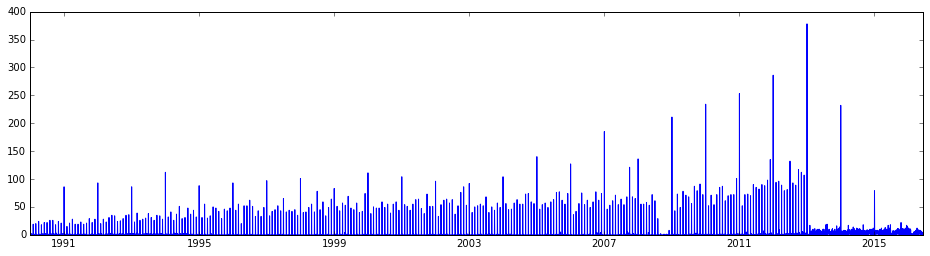

In [22]:
x, y = unzip(hist_data('higgs', '1990-01-01', '2017-01-01'))
plt.plot(x, y)

In [38]:
np.mean(y)

2.8818595982605095

In [39]:
fft_general = np.fft.rfft(y)

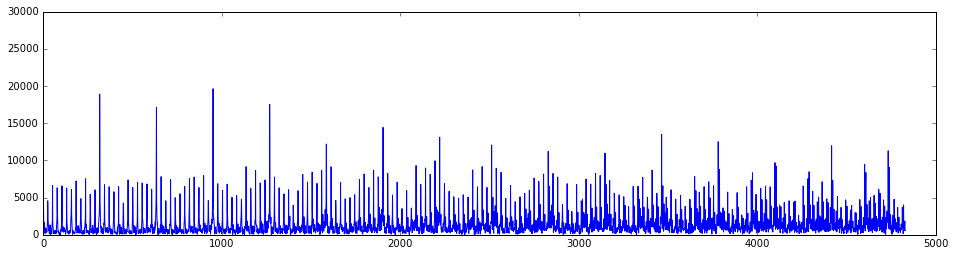

In [40]:
plt.plot(np.abs(fft_general))

In [15]:
fL = 0.001
N = 200
h = np.sinc(2 * fL * (np.arange(N) - (N - 1) / 2.))
h *= np.blackman(N)
h /= np.sum(h)

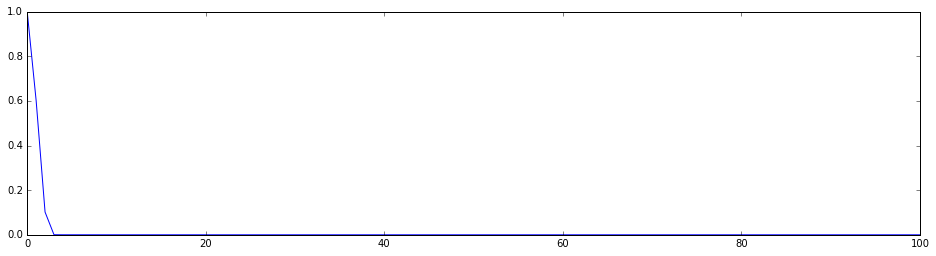

In [16]:
plt.plot(np.abs(np.fft.rfft(h)))

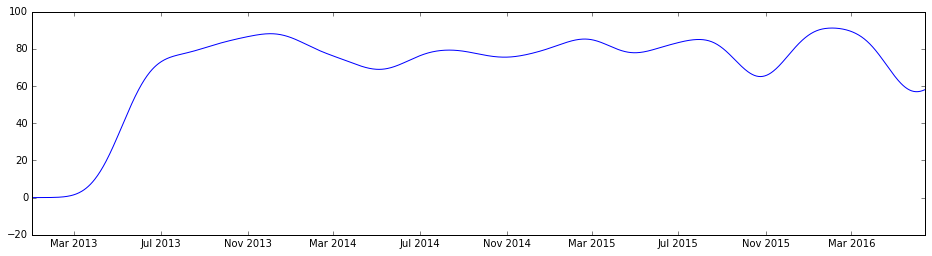

In [17]:
plt.plot(x, sp.signal.lfilter(h, 1.0, y))